# Testing LayoutXLM model

Here, we're gonna do Name Entity Recognition (NER). This consists of identifying the entities in a text and classifying them into predefined categories such as the number of exam, date, ...

## Pre processing data

Extracted Text:
 COPIE INTERNE 29/10/2024
Dr HOLBRECHTS STéPHANE
C.H.U. AMBROISE PARE
BOULEVARD PR. KENNEDY, 2
Centre d’Anatomie
Pathologique H.U.B. 7000 MONS
Rue Meylemeersch 90 - 1070 Anderlecht
Mijlemeerschstraat 90 – 1070 Anderlecht
PATIENT :
Directrice de Service
Pr Myriam Remmelink
ID :
Réf. Externe : 24218507-1.1 EXAMEN : 24EM03308
Equipe Médicale
Dr Nicolas de Saint Aubain
Pr Nicky D’Haene Prélevé le à Prescripteur : Dr HOLBRECHTS STéPHANE
Dr Maria Gomez Galdon Reçu le 29/07/2024
Dr Chirine Khaled
Pr Denis Larsimont
Dr Laetitia Lebrun
Dr Calliope Maris
Pr Jean-Christophe Noël
Pr Isabelle Salmon
Dr Anne-Laure Trépant
Pr Laurine Verset
RECHERCHE PAR « NEXT GENERATION SEQUENCING » DE
Consultant (e) s
Dr Sarah Bouri MUTATIONS DANS 25 GENES IMPLIQUES DANS LES CANCERS
Dr Xavier Catteau PULMONAIRES, LES GIST ET MELANOMES
Dr Roland de Wind
Dr Valérie Segers (Colon and Lung Panel + Oncomine Solid Tumor-plus PANEL)
Dr Anne Theunis
Dr Marie-Paule Van Craynest
HUB – Centre d’Anatomie Patho

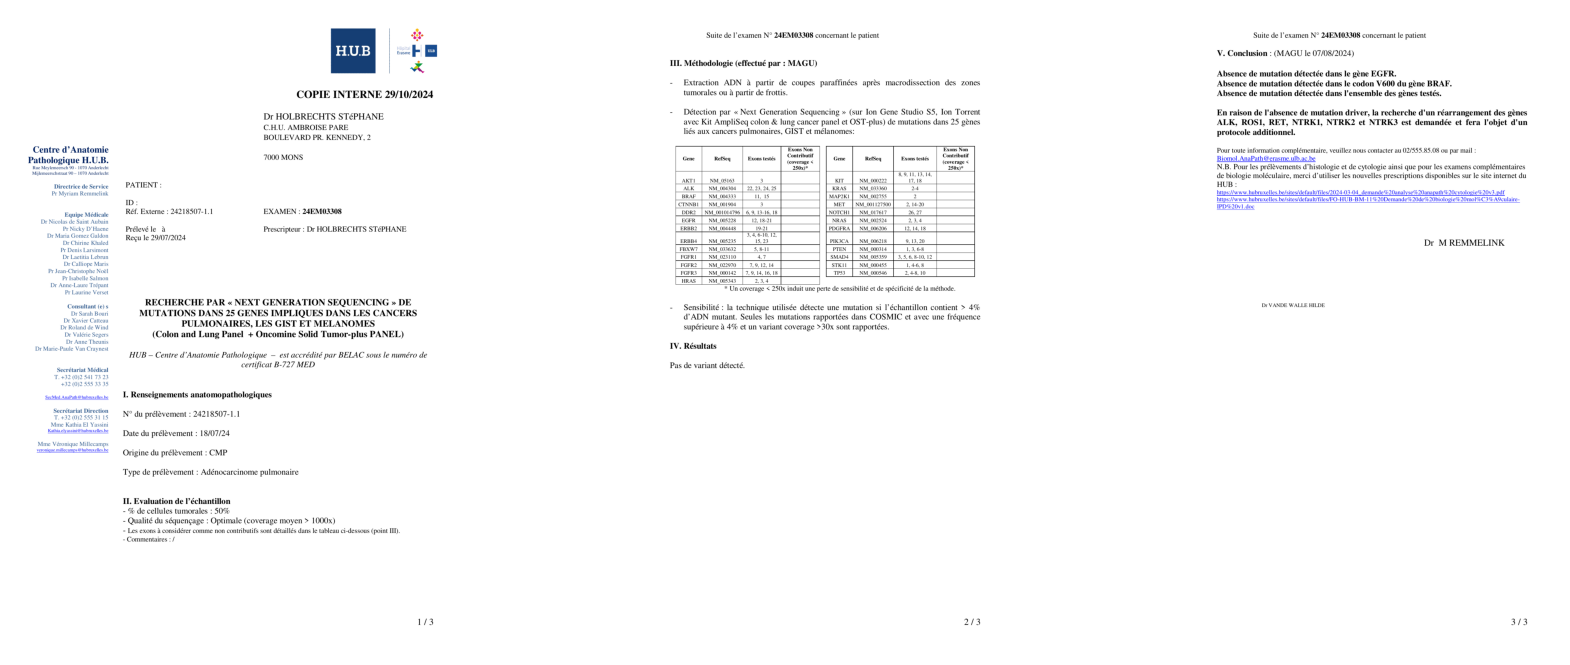

In [ ]:
import fitz #PyMuPDF
import os
import pdfplumber
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# We use pdf plumber because it's more structured than PyMuPDF
pdf_folder_path = "../data/PDF"
save_folder_path = "../data/processed_parser"
pdf_files = [f for f in os.listdir(pdf_folder_path) if f.endswith('.pdf')]
pdf_path = os.path.join(pdf_folder_path, pdf_files[0])

# document = fitz.open(pdf_path) #that's pyMuPDF
# print(document.metadata)

def extract_text_from_pdf(pdf_path):
    text = []
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text.append(page.extract_text())
    return "\n".join(text)
def extract_images_from_pdf(pdf_path):
    images = convert_from_path(pdf_path) 
    return images

pdf_text = extract_text_from_pdf(pdf_path)
print("Extracted Text:\n", pdf_text)
pdf_images = extract_images_from_pdf(pdf_path)
print("Extracted Images:\n", pdf_images)

# Plot the extracted images
fig, axes = plt.subplots(1, len(pdf_images), figsize=(20, 10))
for i, image in enumerate(pdf_images):
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()

## Using the model

Setup of the model

In [ ]:
from transformers import LayoutLMv2Model,  LayoutXLMTokenizer, AutoProcessor, AutoModelForTokenClassification
import torch

# Load LayoutLMv2 processor and NER model
processor = AutoProcessor.from_pretrained("microsoft/layoutxlm-base")
model = AutoModelForTokenClassification.from_pretrained("microsoft/layoutxlm-base")

model = LayoutLMv2Model.from_pretrained("microsoft/layoutxlm-base")
tokenizer = LayoutXLMTokenizer.from_pretrained("microsoft/layoutxlm-base")
model.eval()